### Setup

In [1]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt
import time

### Ejercicio 1
Generamos una matriz de distancias aleatoria y simétrica para 5 puntos.

In [2]:
np.random.seed(28)
D = np.random.randint(1, 4, size=(5, 5))
for i in range(5):
    for j in range(i, 5):
        if i == j:
            D[i, j] = 0
        else:
            d = max(D[i, j], D[j, i])
            D[i, j] = d
            D[j, i] = d
print(f'D =\n{D}')

D =
[[0 2 2 3 2]
 [2 0 1 1 1]
 [2 1 0 3 3]
 [3 1 3 0 3]
 [2 1 3 3 0]]


Observamos la filtracion de Vietoris-Rips a partir de `D`, donde $D[i, j] = d(v_i, v_j)$.

Sea $K_i$ el complejo en el paso `i` con $i = 0, 1, 2, 3$. Basta mostrar sus simplices maximales.
- $K_0: \{\{v_5\}, \{v_1\}, \{v_2\}, \{v_3\}, \{v_4\}\}$
- $K_1: \{\{v_2, v_3\}, \{v_2, v_4\}, \{v_2, v_5\}\}$
- $K_2: \{\{v_1, v_3\}, \{v_1, v_2, v_3\}, \{v_1, v_2, v_5\}\}$
- $K_3: \{\{v_1, v_2, v_3, v_4, v_5\}\}$

## Ejercicio 2

In [3]:
# 2. Construcción del complejo de Vietoris-Rips con GUDHI
rips_complex = gudhi.RipsComplex(distance_matrix=D, max_edge_length=3.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

# 3. Cálculo de la homología persistente
persistence=simplex_tree.persistence()

In [4]:
def plot_persistence_barcode(persistence, ax = None):
    '''
    Parametros:
    ----------
    
    persistence: list of tuples (dimension, (birth, death))
    '''
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))

    bar_idx = 0
    for dim in sorted(set(d for d, _ in persistence)):
        intervals = [interval for d, interval in persistence if d == dim]
        for i, (birth, death) in enumerate(intervals):
            if death == float('inf'):
                death = max(birth + 1, 4)
            plt.plot([birth, death], [bar_idx, bar_idx], marker='', c=f'C{dim}', linewidth=2, label=f'Dim {dim}' if i==0  else "")
            # Markers at birth and death
            plt.plot(birth, bar_idx, marker='|', c=f'C{dim}')
            plt.plot(death, bar_idx, marker='4', c=f'C{dim}', markersize=5)
            bar_idx += 1

    plt.xlabel('Filtration Value')
    plt.ylabel('Barcode Index')
    plt.title('Barcode')
    plt.yticks([])
    x_vals = sorted([death for _, (_, death) in persistence if death != float('inf')])
    x_labels = [f'{x:.2f}' for x in x_vals] + ['∞']
    plt.xticks(x_vals + [max(x_vals) + 1], x_labels)
    if len(persistence) < 20:
        plt.ylim(-10/len(persistence), len(persistence)*2)
    plt.legend()
    plt.show()

def plot_persistence(persistence, ax = None):
    '''
    Parametros:
    ----------
    
    persistence: list of tuples (dimension, (birth, death))
    '''
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    gudhi.plot_persistence_diagram(persistence, axes=ax[0])
    plot_persistence_barcode(persistence, ax=ax[1])

    ax[0].set_title("Persistence Diagram")
    ax[1].set_title("Barcode")

    plt.tight_layout()
    plt.show()

c:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\gudhi\persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


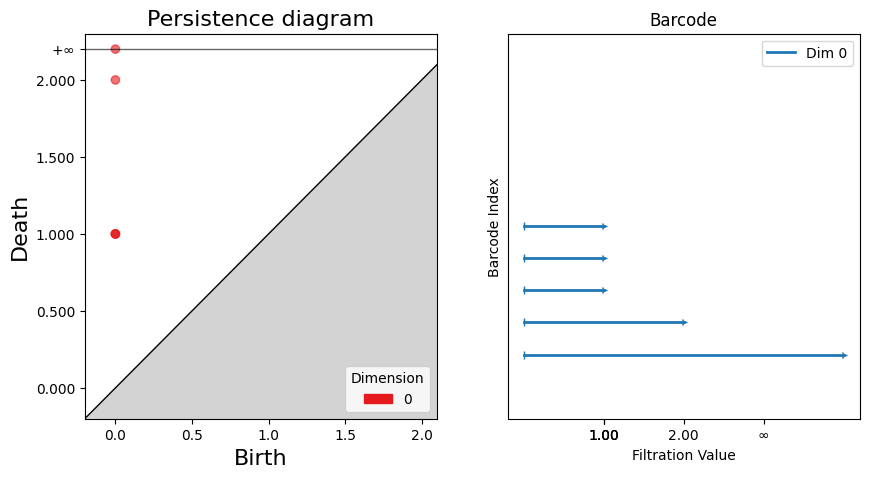

<Figure size 640x480 with 0 Axes>

In [5]:
plot_persistence(persistence)

### Ejercicio 3

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# Crear el grafo con un ciclo exterior de 6 nodos y un ciclo interior de 3 nodos
cicle_ext = nx.cycle_graph(6)
cicle_int = nx.cycle_graph(3)
cicle_int = nx.relabel_nodes(cicle_int, {i:i+cicle_ext.number_of_nodes() for i in cicle_int.nodes})
G = nx.compose(cicle_ext, cicle_int)

# Aristas adicionales para el plano proyectivo
new_edges = {
    0: [7],
    1: [7, 8],
    2: [8],
    3: [6, 8],
    4: [6],
    5: [6, 7]
}
for src, dst in new_edges.items():
    for d in dst:
        G.add_edge(src, d)

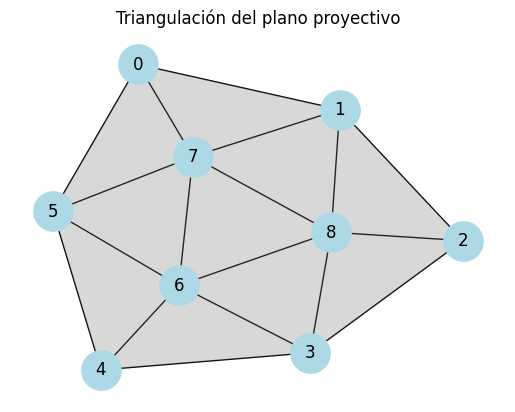

In [8]:
from matplotlib.patches import Polygon

# Plot grafo y fija posiciones
pos = nx.spring_layout(G, seed=3)
fig, ax = plt.subplots()

nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', node_size=800)

# Encontrar todos los triángulos en el grafo
simplex_3s = [list(triangle) for triangle in nx.enumerate_all_cliques(G) if len(triangle) == 3]

for triangle in simplex_3s:
    triangle_coords = [pos[node] for node in triangle]
    triangle_patch = Polygon(triangle_coords, fill=True, facecolor='gray', alpha=0.3)
    ax.add_patch(triangle_patch)

plt.title("Triangulación del plano proyectivo")
plt.show()

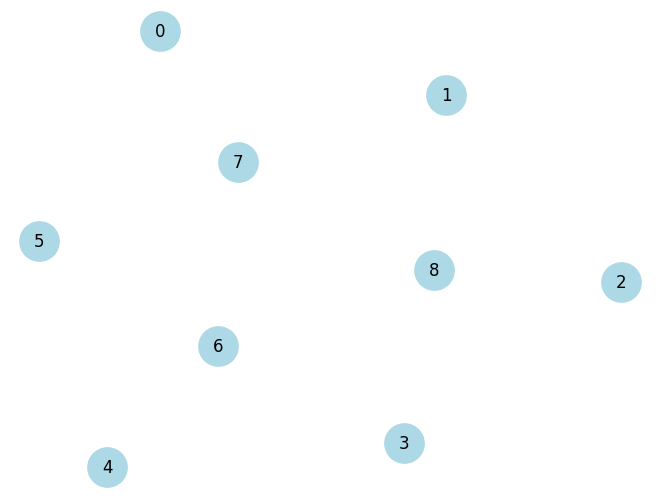

In [ ]:
# Grafo vacio con las mismas posiciones
G = nx.empty_graph(pos.keys())
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)